# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (15)

**11/12/2023**

# `ALEJANDRO SÁNCHEZ MONZÓN`

## Clasificación con métodos Bayesianos (clasificador _Naive Bayes_) 

In [1]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

---

In [3]:
# Cargar el dataset desde un archivo

df_aire_calidad = pd.read_csv('Calidad_aire_procesado.csv')

In [4]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_aire_calidad.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_aire_calidad['Escenario']

In [5]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import MinMaxScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = MinMaxScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[0.33027523, 0.03406823, 0.05414433, ..., 0.        , 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.05590226, ..., 0.04347826, 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.03902611, ..., 0.08695652, 0.        ,
        0.33333333],
       ...,
       [0.        , 0.76519772, 0.19680056, ..., 0.7826087 , 0.66666667,
        0.33333333],
       [0.        , 0.76519772, 0.18229762, ..., 0.82608696, 0.66666667,
        1.        ],
       [0.        , 0.76519772, 0.16603674, ..., 0.86956522, 0.66666667,
        0.        ]])

In [6]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
0,0.330275,0.034068,0.054144,0.357436,0.008447,0.271322,0.366277,0.4600,0.0600,0.186757,...,0.00,0.694118,0.653740,0.665595,0.801418,0.818182,0.0,0.000000,0.000000,0.333333
1,0.330275,0.034068,0.055902,0.386154,0.009198,0.273565,0.402687,0.4800,0.0800,0.189393,...,0.00,0.682353,0.642659,0.652733,0.808511,0.818182,0.0,0.043478,0.000000,0.333333
2,0.330275,0.034068,0.039026,0.436410,0.007665,0.217186,0.457737,0.4100,0.0500,0.173235,...,0.00,0.667647,0.628809,0.636656,0.812057,0.818182,0.0,0.086957,0.000000,0.333333
3,0.330275,0.034068,0.024611,0.285641,0.004892,0.163690,0.311660,0.3300,0.0400,0.127725,...,0.00,0.655882,0.617729,0.623794,0.819149,0.818182,0.0,0.130435,0.000000,0.333333
4,0.330275,0.034068,0.023205,0.272821,0.005447,0.140626,0.273949,0.2500,0.0500,0.106521,...,0.11,0.650000,0.612188,0.617363,0.812057,0.818182,0.0,0.173913,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,0.000000,0.765198,0.183440,0.452564,0.046543,0.036438,0.505635,0.1425,0.4550,0.227579,...,0.05,0.400000,0.376731,0.379421,0.166667,0.090909,0.7,0.695652,0.666667,0.333333
49250,0.000000,0.765198,0.174739,0.513718,0.046111,0.043245,0.495990,0.1825,0.4575,0.242967,...,0.05,0.352941,0.332410,0.344051,0.180851,0.090909,0.7,0.739130,0.666667,0.333333
49251,0.000000,0.765198,0.196801,0.556795,0.048516,0.044286,0.522865,0.2000,0.4825,0.264942,...,0.05,0.302941,0.285319,0.305466,0.195035,0.090909,0.7,0.782609,0.666667,0.333333
49252,0.000000,0.765198,0.182298,0.525513,0.050090,0.044526,0.530668,0.1925,0.4975,0.254952,...,0.05,0.270588,0.254848,0.273312,0.205674,0.090909,0.7,0.826087,0.666667,1.000000


In [7]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)

---

### **`Ejercicio 15.1`**

**`15.1.1`** Construye con el mismo dataset otros dos modelos de clasificación usando las técnicas de __Complement Naive Bayes__ y __Naive Bayes classifier for multivariate Bernoulli models__. Después, calcula diferentes métricas para evaluar estos nuevos modelo y analiza su rendimiendo en comparación con modelos anteriores desarrollados en la sesión.
- Accuracy
- Classification report
- AUC

**`15.1.2`** Saca la gráfica de el *Learning Curve* para los dos nuevos modelos calculando el área bajo la curva de funcionamiento del receptor para los datos de _train_ y de _test_, y explica si alguno tiene preferencia o no, comparando con modelos anteriores.

In [8]:
## Solución
# Ejercicio 15.1.1
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.naive_bayes import ComplementNB

print("ComplementNB")
print("------------")

clas_compl = ComplementNB()

clas_compl.fit(X_train, y_train)

y_pred_compl = clas_compl.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_compl))

print(classification_report(y_test, y_pred_compl))

print('AUC:', roc_auc_score(y_test, y_pred_compl))

ComplementNB
------------
Accuracy: 0.6697797177951477
              precision    recall  f1-score   support

           0       0.40      0.71      0.51      2404
           1       0.87      0.66      0.75      7447

    accuracy                           0.67      9851
   macro avg       0.64      0.68      0.63      9851
weighted avg       0.76      0.67      0.69      9851

AUC: 0.6827163201208676


In [9]:
from sklearn.naive_bayes import BernoulliNB

print("BernoulliNB")
print("-----------")

clas_bern = BernoulliNB()

clas_bern.fit(X_train, y_train)

y_pred_bern = clas_bern.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_bern))

print(classification_report(y_test, y_pred_bern))

print('AUC:', roc_auc_score(y_test, y_pred_bern))

BernoulliNB
-----------
Accuracy: 0.7635773017967719
              precision    recall  f1-score   support

           0       0.55      0.18      0.27      2404
           1       0.78      0.95      0.86      7447

    accuracy                           0.76      9851
   macro avg       0.67      0.56      0.56      9851
weighted avg       0.72      0.76      0.71      9851

AUC: 0.5648949470322391


> #### Explicación 15.1.1
> El modelo que utiliza la técnica **Complement Naive Bayes** no mejora por mucho al peor modelo de la sesión, teniendo unos valores ciertamente parejos, y un f1 con valores bastante normales, pero nada destacable.
>
> El modelo que utiliza la técnica **Naive Bayes classifier for multivariate Bernoulli models** tiene valores algo mejores pra accuracy, con aproximadamente 10 puntos por encima, pero un valor de AUC bajo comparado con modelos de otras sesiones.
>
> **No** son modelos muy **destacables** por su rendimiento, por lo que habrá que compararlos con otros modelos de la sesión.

La diferencia final del rendimiento del modelo entre training y test es=  0.009851064059943626


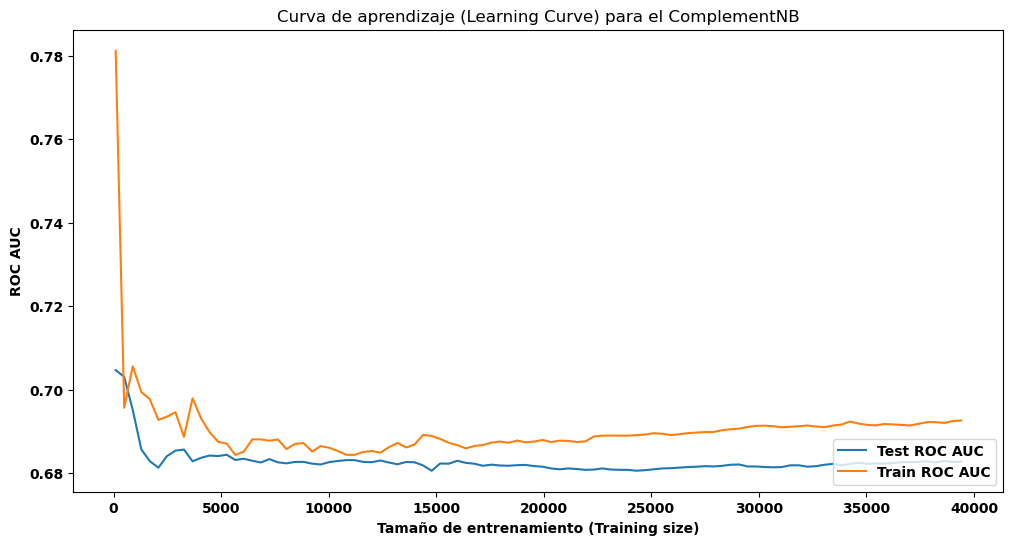

In [10]:
## Solución
# Ejercicio 15.1.2
modelo_bayes_15_1_2_a = ComplementNB()

num_samples_15_1_2_a = np.linspace(100,X_train.shape[0],100).astype(int)

train_score_15_1_2_a = np.zeros(num_samples_15_1_2_a.size)
test_score_15_1_2_a = np.zeros(num_samples_15_1_2_a.size)

for i in range(num_samples_15_1_2_a.size):
    modelo_bayes_15_1_2_a.fit(X_train[:num_samples_15_1_2_a[i]], y_train[:num_samples_15_1_2_a[i]])

    train_score_15_1_2_a[i] = roc_auc_score(y_train[:num_samples_15_1_2_a[i]], modelo_bayes_15_1_2_a.predict(X_train[:num_samples_15_1_2_a[i]]))
    test_score_15_1_2_a[i] = roc_auc_score(y_test, modelo_bayes_15_1_2_a.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score_15_1_2_a[-1]-test_score_15_1_2_a[-1])

plt.plot(num_samples_15_1_2_a, test_score_15_1_2_a, label = 'Test ROC AUC')
plt.plot(num_samples_15_1_2_a, train_score_15_1_2_a, label = 'Train ROC AUC')
plt.title('Curva de aprendizaje (Learning Curve) para el ComplementNB')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('ROC AUC')
plt.legend(loc = 'lower right')
plt.show()

La diferencia final del rendimiento del modelo entre training y test es=  -0.0014772506691198561


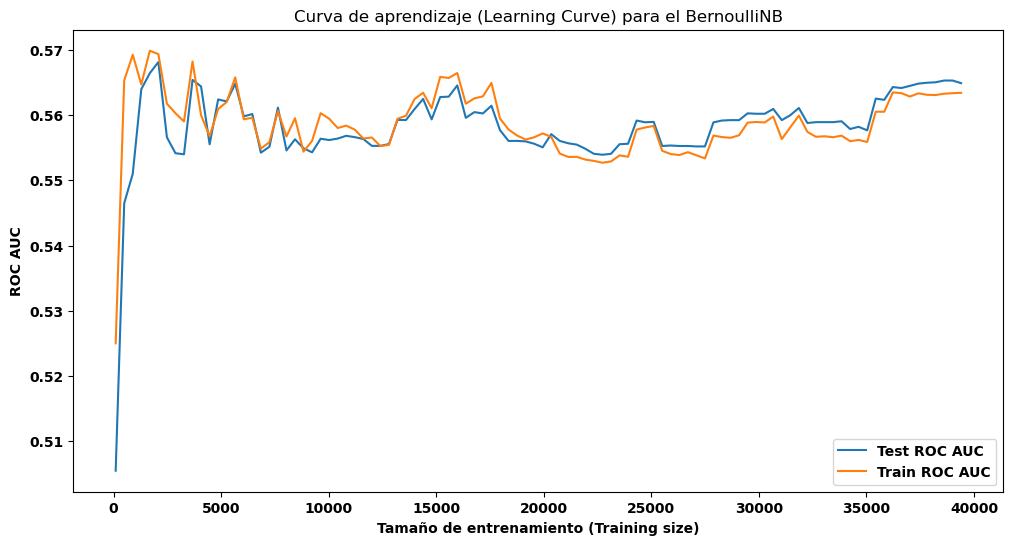

In [11]:
modelo_bayes_15_1_2_b = BernoulliNB()

num_samples_15_1_2_b = np.linspace(100,X_train.shape[0],100).astype(int)

train_score_15_1_2_b = np.zeros(num_samples_15_1_2_b.size)
test_score_15_1_2_b = np.zeros(num_samples_15_1_2_b.size)

for i in range(num_samples_15_1_2_b.size):
    modelo_bayes_15_1_2_b.fit(X_train[:num_samples_15_1_2_b[i]], y_train[:num_samples_15_1_2_b[i]])

    train_score_15_1_2_b[i] = roc_auc_score(y_train[:num_samples_15_1_2_b[i]], modelo_bayes_15_1_2_b.predict(X_train[:num_samples_15_1_2_b[i]]))
    test_score_15_1_2_b[i] = roc_auc_score(y_test, modelo_bayes_15_1_2_b.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score_15_1_2_b[-1]-test_score_15_1_2_b[-1])

plt.plot(num_samples_15_1_2_b, test_score_15_1_2_b, label = 'Test ROC AUC')
plt.plot(num_samples_15_1_2_b, train_score_15_1_2_b, label = 'Train ROC AUC')
plt.title('Curva de aprendizaje (Learning Curve) para el BernoulliNB')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('ROC AUC')
plt.legend(loc = 'lower right')
plt.show()

> #### Explicación 15.1.2
> Las curvas de aprendizaje de estos modelos no presentan gráficas muy destacables si nos fijamos en un buen rendimiento.
>
> La curva de aprendizaje para el clasificador Complement presenta un **gap muy bajo** en ciertos puntos de la sesión, las gráficas para sus conjuntos de datos llegan a converger para tamaños de entrenamiento pequeños, y posteriormente su gap varía. La **tendencia** de dicha curva de aprendizaje parece ser **la misma** durante todo el tamaño del entrenamiento, con valores para ROC AUC algo bajos, sin duda no son destacables por ser valores altos. Esto nos da a entender que dicho modelo podría sufrir de **underfitting** (con un riesgo muy bajo de overfitting). 
>
> Por otro lado, para la curva de aprendizaje del clasificador para modelos Bernoulli, podemos observar que las gráficas de los conjuntos de datos (train y test) **convergen varias veces** a lo largo de todo el entrenamiento, teniendo por comun un **gap muy bajo**. A esto le sumamos que el modelo aparentemente **generaliza bastante bien**, los valores de ROC AUC aumentan y disminuyen constantemente según aumenta el tamaño del entrenamiento, y aún asi tiene similitud entre la gráfica para el subconjunto de train y el de test, dando también a entender que el **riesgo** de **overfitting** es **bajo**.

---

In [12]:
from sklearn.neighbors import KNeighborsClassifier

clas_knn2 = KNeighborsClassifier(n_neighbors=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_knn2.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_knn2 = clas_knn2.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_knn2))

print(classification_report(y_test, y_pred_knn2))

print('AUC:', roc_auc_score(y_test, y_pred_knn2))

Acuuracy: 0.8496599330017257
              precision    recall  f1-score   support

           0       0.78      0.54      0.64      2404
           1       0.86      0.95      0.91      7447

    accuracy                           0.85      9851
   macro avg       0.82      0.74      0.77      9851
weighted avg       0.84      0.85      0.84      9851

AUC: 0.7435211881097861


In [13]:
from sklearn.neighbors import KNeighborsClassifier

clas_knn_opt = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_knn_opt.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_knn_opt = clas_knn_opt.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_knn_opt))

print(classification_report(y_test, y_pred_knn_opt))

print('AUC:', roc_auc_score(y_test, y_pred_knn_opt))

Acuuracy: 0.9101614049335093
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      2404
           1       0.94      0.94      0.94      7447

    accuracy                           0.91      9851
   macro avg       0.88      0.88      0.88      9851
weighted avg       0.91      0.91      0.91      9851

AUC: 0.8777629804137814


### **`Ejercicio 15.2`**

Define una nueva función para obtener la gráfica de *Learning Curve* para los clasificadores ___KNN___. Utiliza esta función nueva considerando los siguientes puntos para sacar las curvas de aprendizaje del modelo óptimo analizado en la sesión (_clas_knn_opt_) y también para el segundo modelo *clas_knn2* (con `n_neighbors=100`). Compara las dos gráficas y explíca y analiza el rendimiento de cada modelo:  

- Incluye los hiperparámetros de `n_neighbors`, `weights` y `p` indicando sus valores por defecto para cuando no se declaran en la llamada a la función.
- (*Sugerencia*: No incluyas más de `5` puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para los modelos que se van a ajustar)

In [14]:
# Solución
# Ejercicio 15.2
from sklearn.neighbors import KNeighborsClassifier

def curva_aprendizaje_15_2(n_neighbors: int = 5, weights: str = 'uniform', p: int = 2):
    num_samples = np.linspace(100, X_train.shape[0]).astype(int)

    train_score = np.zeros(num_samples.size)
    test_score = np.zeros(num_samples.size)

    mod_knn_15_2 = KNeighborsClassifier(n_neighbors=n_neighbors,
                                weights=weights,
                                p=p,
                                n_jobs=-1)

    for i in range(num_samples.size):
        mod_knn_15_2.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])
        train_score[i] = accuracy_score(y_train[:num_samples[i]], mod_knn_15_2.predict(X_train[:num_samples[i]]))
        test_score[i] = accuracy_score(y_test, mod_knn_15_2.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    plt.figure(figsize=(20,6))
    plt.plot(num_samples, test_score, linewidth=3, label='Test Accuracy')
    plt.plot(num_samples, train_score, linewidth=3, label='Train Accuracy')
    plt.plot(num_samples[np.argmax(test_score)], max(test_score),
            marker='o', color = "red", label="Max Accuracy")
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.xticks(np.linspace(100, X_train.shape[0], 5).astype(int))
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()

La diferencia final del rendimiento del modelo entre training y test es=  0.08983859506649072


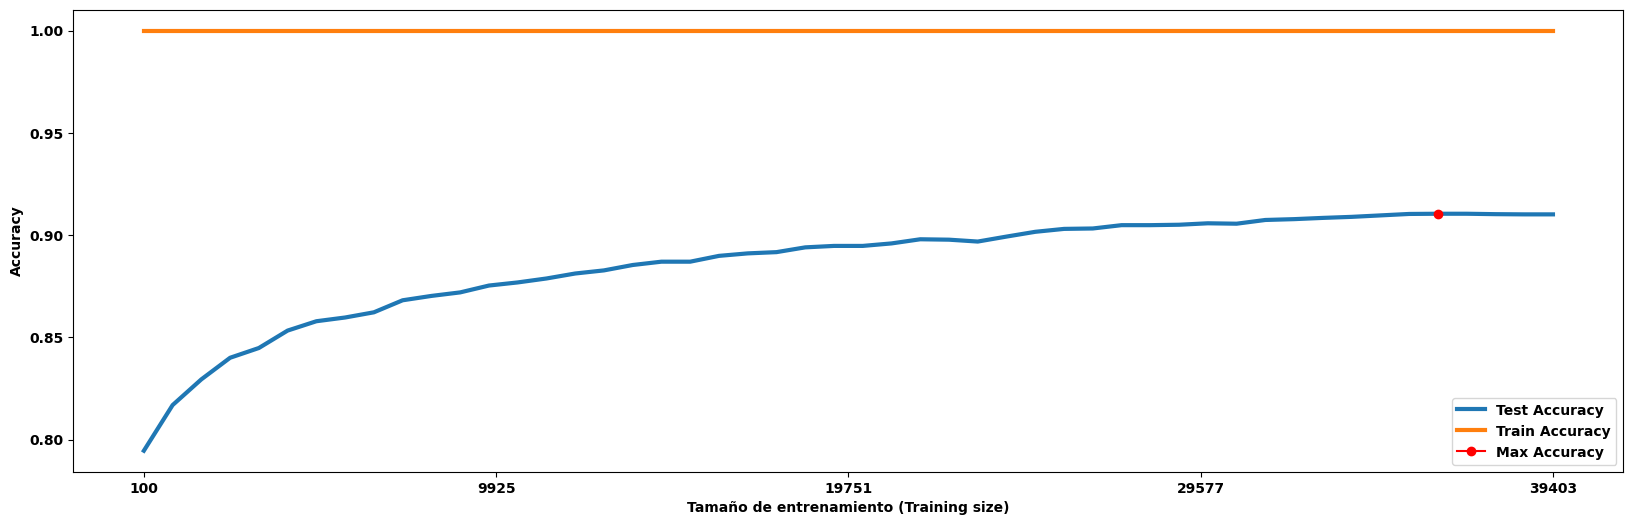

In [15]:
curva_aprendizaje_15_2(n_neighbors=clas_knn_opt.n_neighbors, weights=clas_knn_opt.weights, p=clas_knn_opt.p)

La diferencia final del rendimiento del modelo entre training y test es=  0.0018488353661650914


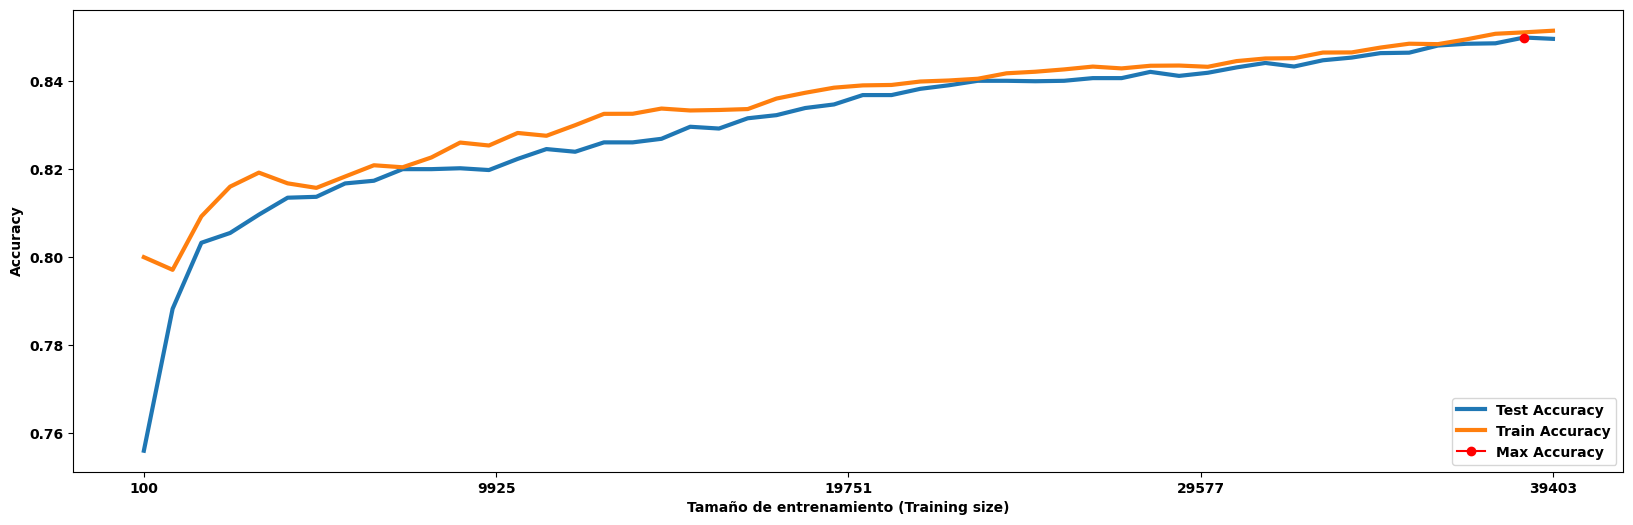

In [16]:
curva_aprendizaje_15_2(n_neighbors=clas_knn2.n_neighbors, weights=clas_knn2.weights, p=clas_knn2.p)

> #### Explicación 15.2
> Ambos modelos presentan unas curvas de aprendizaje bastate curiosas y aparentemente buenas.
> La curva del modelo **clas_knn_opt** presenta una **tendencia** para el conjunto de test **ascendente**, pero las gráficas **nunca** llegan a **converger**, puesto que el subconjunto de train presenta una gráfica plana. Debido a la tendencia ascendente, el **gap** se **reduce poco a poco**, lo que podría inicar una posible convergencia si el tamaño del entrenamiento aumenta.
>
> Para la curva de aprendizaje del modelo **clas_knn2** podemos observar una **convergencia** entre ambas gráficas que se repiten **varias veces** a lo largo del entrenamiento, con un **gap muy bajo** cuando dichas gráficas no convergen, y una **tendencia ascendente** con valores para Accuracy buenos. Podríamos confirmar que el **riesgo** de **overfitting** para este modelo es **bajo**. 

---

In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Definimos la manera de trozear dataset de train para crear los subconjuntos que se utilizan en la validación cruzada (Cross-Validation)
folds = KFold(n_splits=5, shuffle=True, random_state=111)

# Declaramos el tipo de regresor (modelo) y los rangos de hiperparámetros a considerar en la búsqueda
modelo_svc = LinearSVC(random_state=100)
parametros = {"C": np.logspace(-5, 5, 20)
              }

# Establecer el área bajo la curva de funcionamiento del receptor como la función de "scoring" a la hora de puntuar los modelos
scoreFun = make_scorer(roc_auc_score)

# Definir el Grid Search y realizar la búsqueda con los datos de entrenamiento
modelo_grid_svc = GridSearchCV(estimator=modelo_svc,
                                 param_grid=parametros,
                                 scoring=scoreFun,
                                 cv=folds,
                                 n_jobs=-1)
modelo_grid_svc.fit(X_train, y_train)

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=LinearSVC(random_state=100), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])},
             scoring=make_scorer(roc_auc_score))

In [18]:
from sklearn.svm import SVC

clas_svc = SVC(random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_svc.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_svc = clas_svc.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_svc))

print(classification_report(y_test, y_pred_svc))

print('AUC:', roc_auc_score(y_test, y_pred_svc))

Acuuracy: 0.8893513348898588
              precision    recall  f1-score   support

           0       0.84      0.68      0.75      2404
           1       0.90      0.96      0.93      7447

    accuracy                           0.89      9851
   macro avg       0.87      0.82      0.84      9851
weighted avg       0.89      0.89      0.89      9851

AUC: 0.816956632191949


In [19]:
from sklearn.svm import SVC

clas_svc3 = SVC(C=modelo_grid_svc.best_params_['C'], gamma=0.75, random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_svc3.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_svc3 = clas_svc3.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_svc3))

print(classification_report(y_test, y_pred_svc3))

print('AUC:', roc_auc_score(y_test, y_pred_svc3))

Acuuracy: 0.9213277839813216
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2404
           1       0.94      0.96      0.95      7447

    accuracy                           0.92      9851
   macro avg       0.90      0.89      0.89      9851
weighted avg       0.92      0.92      0.92      9851

AUC: 0.885711887018793


### **`Ejercicio 15.3`**

Define una nueva función para obtener la gráfica de *Learning Curve* para los clasificadores ___SVC___. Utiliza esta función nueva considerando los siguientes puntos para sacar las curvas de aprendizaje del último modelo desarrollado en la sesión (*clas_svc3*) y también para el modelo por defecto *clas_svc*. Compara las dos gráficas y explíca y analiza el rendimiento de cada modelo:

- Incluye los hiperparámetros de `C` y `gamma` indicando sus valores por defecto para cuando no se declaran en la llamada a la función.  
- considera `random_state=100`
- (*Sugerencia*: No incluyas más de `4` puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para los modelos que se van a ajustar)

In [20]:
## Solución
# Ejercicio 15.3
from sklearn.svm import SVC

def curva_aprendizaje_15_3(c: float = 1, gamma: str = 'scale'):
    num_samples = np.linspace(100, X_train.shape[0]).astype(int)

    train_score = np.zeros(num_samples.size)
    test_score = np.zeros(num_samples.size)

    mod_knn_15_3 = SVC(C=c,
                    gamma=gamma,
                    random_state=100)

    for i in range(num_samples.size):
        mod_knn_15_3.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])
        train_score[i] = accuracy_score(y_train[:num_samples[i]], mod_knn_15_3.predict(X_train[:num_samples[i]]))
        test_score[i] = accuracy_score(y_test, mod_knn_15_3.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    plt.figure(figsize=(20,6))
    plt.plot(num_samples, test_score, linewidth=3, label='Test Accuracy')
    plt.plot(num_samples, train_score, linewidth=3, label='Train Accuracy')
    plt.plot(num_samples[np.argmax(test_score)], max(test_score),
            marker='o', color = "red", label="Max Accuracy")
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.xticks(np.linspace(100, X_train.shape[0], 4).astype(int))
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()


La diferencia final del rendimiento del modelo entre training y test es=  0.03012261319655818


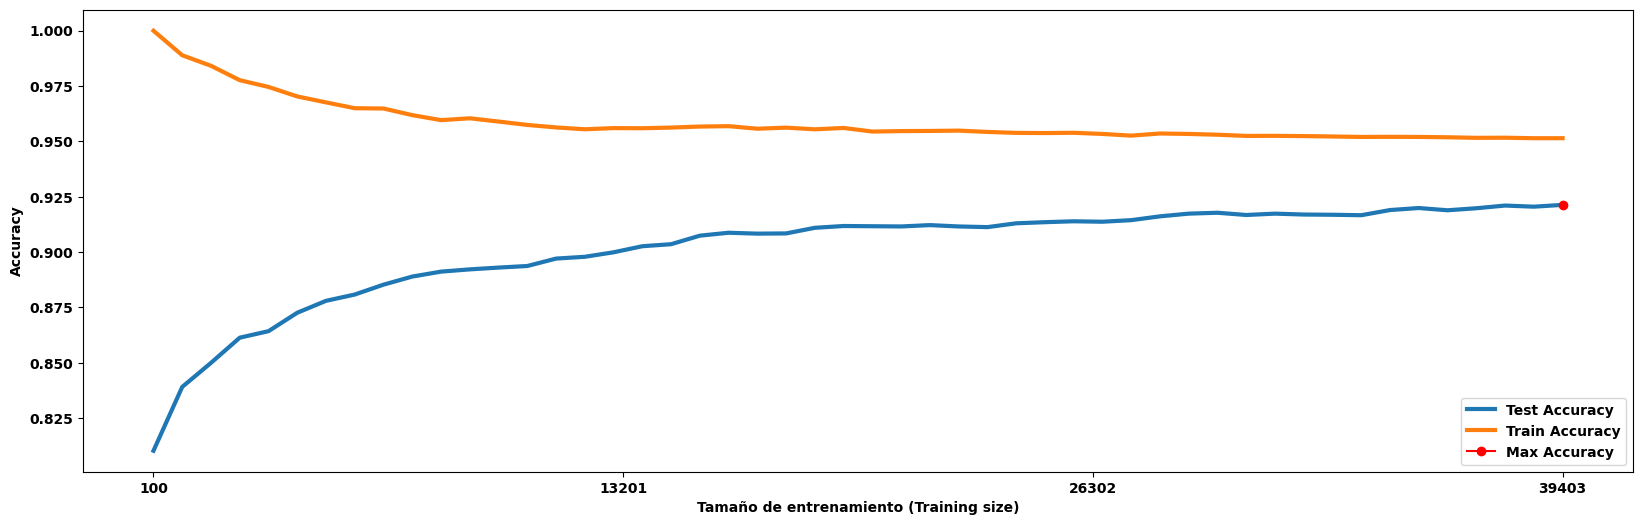

In [21]:
curva_aprendizaje_15_3(c=clas_svc3.C, gamma=clas_svc3.gamma)

La diferencia final del rendimiento del modelo entre training y test es=  0.0015199185679997118


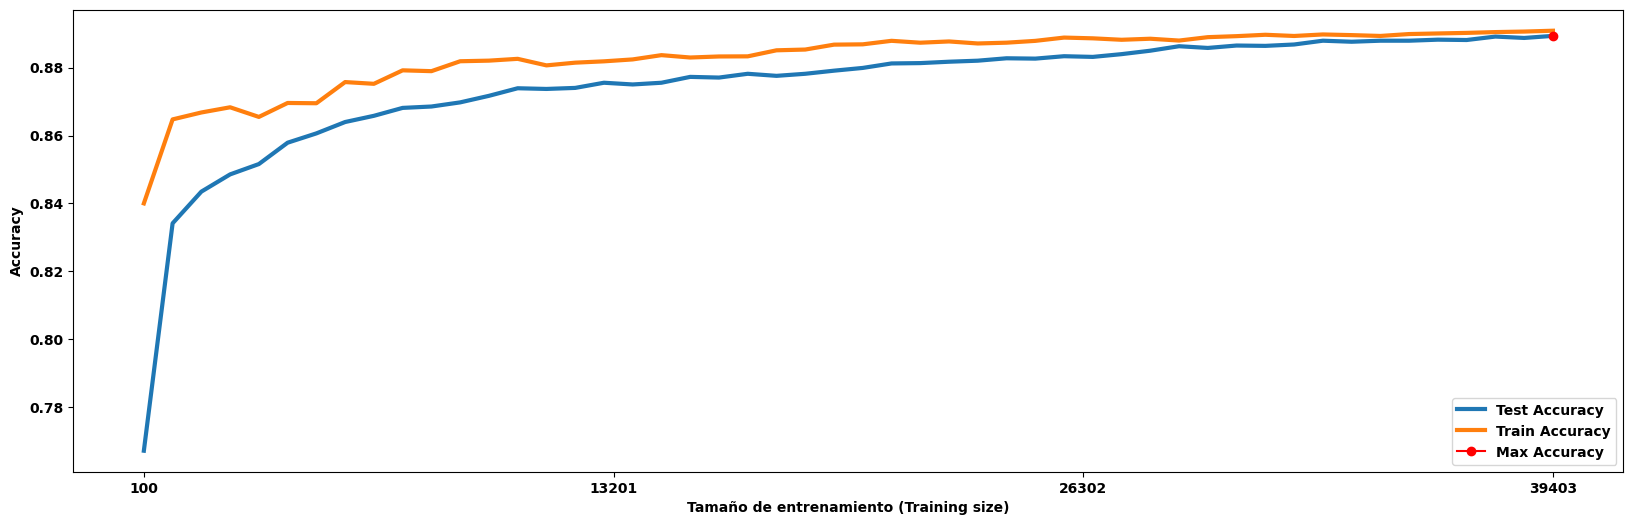

In [22]:
curva_aprendizaje_15_3(c=clas_svc.C, gamma=clas_svc.gamma)

> #### Explicación 15.3
> Dadas las curvas de aprendizaje de los dos modelos anteriores, podemos decir que la curva del modelo **clas_svc3** presenta una **tendencia ascendente** para el conjunto de test,  con un **gap** que **se va reduciendo** en relacion al conjunto de entrenamiento, y que muy posiblemente **acaben covergiendo** si el tamaño del entrnemaiento aumenta, tambien podemos observar que los valores de accuracy para dicho modelo dentro de la curva de aprenzidaje son bastante buenos, todo esto nos da aentender que **no** será un modelo con un alto **riesgo** de **overfitting**.
>
> Por otro lado, al curva del modelo clas_svc resulta algo más interesante, ya que las gráficas para los subconjuntos de train y test presentan **tendencias ascendentes**, e incluso se ve como el **gap** va poco a poco **reduciendose**, lo que nos da a entender que ambas gráficas **acabaran convergiendo** si el tamaño del entrenamiento aumenta. Podemos observar tambien que los valores de accuracy son bastante buenos, aunque algo peores que en el modelo clas_svc3. Añadir tambien que podemos considerar que este modelo tendrá tambien un **riesgo de overfitting bajo**.